# Merkezi Limit Teoremi (MLT) - Yeniden

## 📚 MLT'ye Giriş

ℹ️ `Challenge - The Central Limit Theorem - A first approach` sırasında okuduysanız, `Recap - Central Limit Theorem - Revisited` içindeki bu bölümü atlayabilirsiniz.

**Olasılık ve istatistik alanlarını dönüştüren iki yakınsaklık teoremi:**
- **`LLN`: Büyük Sayılar Kanunu**
- **`CLT/MLT`: Merkezi Limit Teoremi**

🧑🏻‍🏫 MLT nedir? [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem) tanımına göre:

> Olasılık kuramında merkezi limit teoremi (MLT), birçok durumda bağımsız rassal değişkenler toplandığında, uygun şekilde normalize edilen toplamın, başlangıçtaki değişkenler normal dağılmasa bile, `Gauss/normal dağılıma` (sezgisel olarak `çan eğrisi`) yaklaştığını söyler. Bu teorem, normal dağılımlar için çalışan olasılıksal ve istatistiksel yöntemlerin, diğer dağılım türlerini içeren birçok probleme de uygulanabilmesini sağladığı için olasılık kuramının temel kavramlarındandır.

## 🎯 MLT'yi Yorumlama ve Deneyleme

🎯  [Merkezi Limit Teoremi](https://en.wikipedia.org/wiki/Central_limit_theorem)'nin bir veri setinde nasıl kullanıldığını görelim:

* Bir anakütle (popülasyon) verildiğinde, her birey için bir özelliği (örn. boy, kilo, maaş vb.) ele alalım.

🚀  Bu iki teoremden çıkarılacak önemli sonuç şudur: Anakütledeki bir özelliğin dağılımı **hangi şekle sahip olursa olsun**, **örneklem ortalamasının dağılımı** (örneklenen ortalamalar) **Gauss/normal dağılıma yaklaşma eğilimindedir**:
* `ortalamaların ortalaması` = $ \mu$ (Büyük Sayılar Kanunu)
* `ortalamaların standart sapması` = $ \frac{\sigma}{\sqrt{n}} $  (Merkezi Limit Teoremi)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

💡  Bunu şöyle özetleyebiliriz:

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

İkna olmadınız mı? Önce bu [kod yazmadan kullanılabilen veri görselleştirme aracı](https://seeing-theory.brown.edu/probability-distributions/) ile kendiniz oynayın!
 (CTL bölümü)

<img src="/ctl_playground.png" width=500>

👩🏻‍🔬  Bunu Python ile deneysel olarak doğrulayalım!

##  🚀 Haydi başlayalım!

👉 Bu çalışmada, Merkezi Limit Teoremi'ni göstermek için `seaborn` kütüphanesindeki `tips` veri setini kullanacağız.

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
# Scientific libraries
import scipy.stats as stats
# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

❓ `seaborn` içinden `tips` veri setini `df` değişkenine yükleyin ve ilk satırları görüntüleyin ❓

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 🧐 Keşifsel Veri Analizi (EDA)

❓ Veri setinde kaç satır var ❓

In [3]:
df.shape[0]

244

📊 Restorandaki `total_bill` sütununun dağılımını çizin.

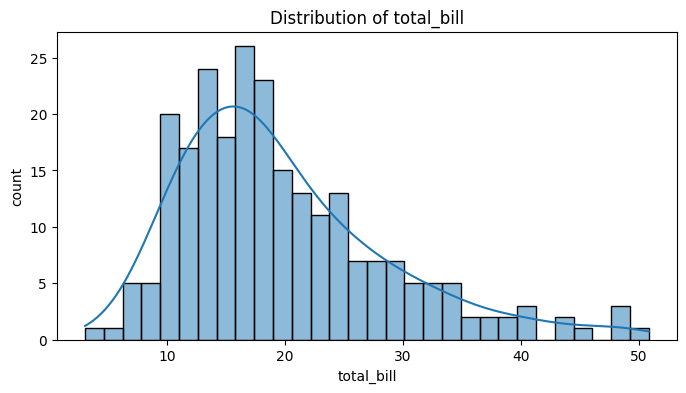

In [4]:
plt.figure(figsize=(8,4))
sns.histplot(df["total_bill"], bins=30, kde=True)
plt.title("Distribution of total_bill")
plt.xlabel("total_bill")
plt.ylabel("count")
plt.show()

❓ Bu dağılımın [**çarpıklık (skewness)**](https://whatis.techtarget.com/definition/skewness) değeri nedir ❓

In [5]:
df["total_bill"].skew()

1.1332130376158205

❓ `total_bill` için ortalamayı ve standart sapmayı tutacak şekilde sırasıyla `mu` ve `sigma` adında iki değişken oluşturun ❓

In [6]:
mu = df["total_bill"].mean()
sigma = df["total_bill"].std()
mu, sigma

(19.78594262295082, 8.902411954856856)

## 🎲 Örneklem Ortalamasını Örneklemek

👉 Veri setinden rastgele (ve yerine koyarak) 10 satır seçin ve bu örneklemin ortalaması olan $ \bar{X} $ değerini hesaplayın.

Bu hücreyi birkaç kez çalıştırın.
* Her seferinde aynı sonucu mu alıyorsunuz?
* Bunu bekliyor muydunuz?

In [7]:
# df["total_bill"].sample(1000, replace=True).mean()
df["total_bill"].sample(5).mean()

15.588

**n ve N değerlerini değiştirdiğimizde ne olduğuna bakalım.**

👉 $N$ adet örneklemin (her biri büyüklüğü $n$ olan) ortalamalarından oluşan bir listeyi tutmak için `means` adlı bir liste oluşturuyoruz.

📊 Sonra `means` dağılımını **çiziyoruz**.

🕵️‍♀️ *örneklem büyüklüğü n* ve *örneklem sayısı N* ile oynayalım:
- `örneklem büyüklüğü`: $N$ sabit kalsın, `n` değerini `arttırın`. Ne gözlemliyorsunuz?
    - $ n \in \{ 1, 5, 50, 100, 500, 1000 \}$ için 6 dağılımın bulunduğu bir ızgara çizdirin.
- `örneklem sayısı`: bu kez $n$ sabit kalsın, `N` değerini `arttırın`. Ne gözlemliyorsunuz?
    - $ N \in \{ 10, 20, 30, 50, 100, 500 \}$ için 6 dağılımın bulunduğu bir ızgara çizdirin.

Örneklem sayısı $N$ sabitken, <b>`örneklem büyüklüğü` $n$ ile oynamak</b>:

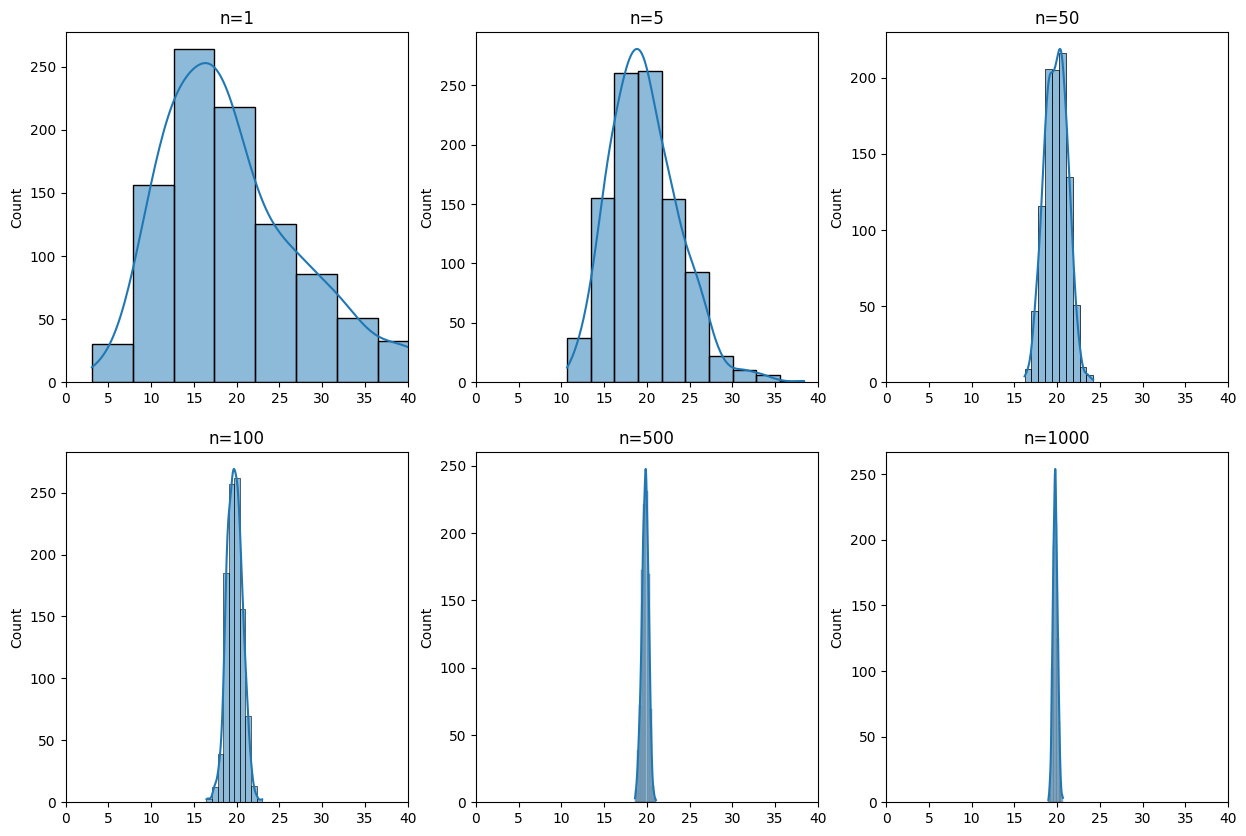

In [8]:
# Number of customers in one sample
list_of_n = [1, 5, 50, 100, 500, 1000]

# Number of CLT experiments
N = 1000

# Plot 6 graphs : 2 rows by 3 columns for the 6 values of n
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for n, ax in zip(list_of_n, axes.flat):
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]
    ax.set_title(f"n={n}")
    ax.set_xlim(0, 40)
    sns.histplot(means, bins=10, ax=ax, kde=True)

💡 *n* arttıkça:
* ortalamaların dağılımı teorik ortalama $ \mu $ değerine yakınsar (LLN)
* $ \mu $ etrafındaki varyans 0'a yaklaşır (çünkü: $ \large \frac{\sigma}{\sqrt{n}} \underset{n \rightarrow \infty}{\rightarrow} 0 $)


Örneklem büyüklüğü $n$ sabitken, <b>`örneklem_sayısı` $N$ ile oynamak</b>:

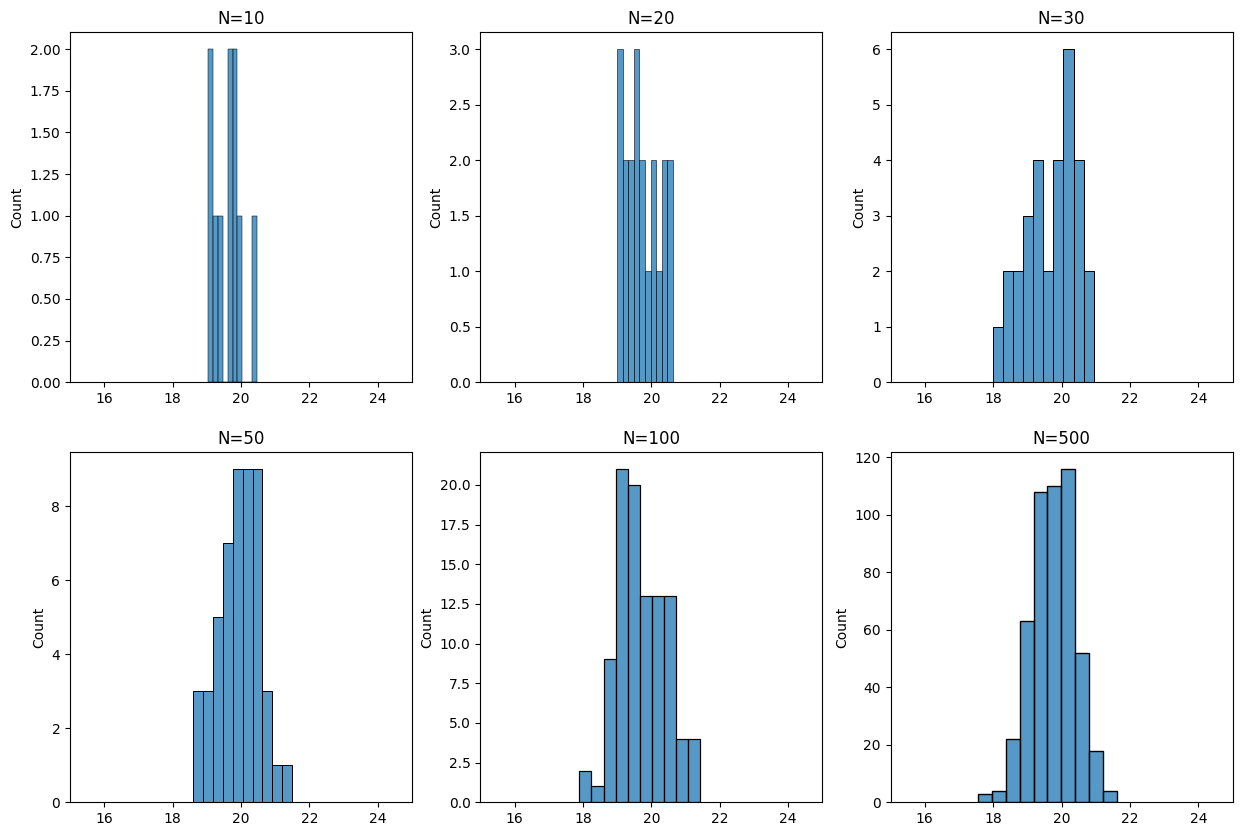

In [9]:
# Number of customers in one sample
n = 200

# Number of samples
list_of_N = [10, 20, 30, 50, 100, 500]

# Plot 6 graphs : 2 rows by 3 columns for the 6 values of N
fix, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for N, ax in zip(list_of_N,axes.flat):
    means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]

    ax.set_title(f"N={N}")
    ax.set_xlim(15, 25)

    sns.histplot(means, bins=10, ax=ax)

💡 *N* arttıkça:
* ortalamaların dağılımı daha az gürültülü olur

## 👩🏻‍💻 Simülasyonlarla MLT'yi Doğrulama:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

🔥 Merkezi Limit Teoremi'ni hesaplamalı (computational) olarak doğrulayalım

Her `n` değeri için:
- `mu` ile "ortalamaların ortalaması"nı karşılaştırın
- `sigma` ile "ortalamaların standart sapması"nı karşılaştırın ( $\sqrt n$ düzeltmesini unutmayın)
- Örnekleme dağılımının `skewness` (çarpıklık) değerini hesaplayın

In [10]:
mu = df["total_bill"].mean()
sigma = df["total_bill"].std()
skew = df["total_bill"].skew()
kurtosis = df["total_bill"].kurtosis()

In [11]:
print(f"mu: {round(mu,2)}")
print(f"sigma: {round(sigma,2)}")
print(f"skewness: {round(skew,2)}")
print(f"kurtosis: {round(kurtosis,2)}")

mu: 19.79
sigma: 8.9
skewness: 1.13
kurtosis: 1.22


In [12]:
N = 5000

list_of_n = [1, 5, 50, 100, 500, 1000, 5000, 10_000]

delta_mu = []
delta_sigma = []
skewness_history = []
kurtosis_history = []

# Simulate for different sample sizes
for n in list_of_n:
    # Create N samples of size n
    sampled_means = [df["total_bill"].sample(n, replace=True).mean() for i in range(N)]

    # Difference in theoretical expectation vs sampled expectation
    mu_diff = mu - np.mean(sampled_means)
    delta_mu.append(mu_diff)

    # Difference in theoretical standard deviation vs. standard deviation
    sigma_diff = sigma / np.sqrt(n) - np.std(sampled_means)
    delta_sigma.append(sigma_diff)

    # Skewness and kurtosis
    skewness_history.append(stats.skew(sampled_means))
    kurtosis_history.append(stats.kurtosis(sampled_means))

results_from_simulation = pd.DataFrame(data={"n": list_of_n,
                                             "𝚫mu": delta_mu,
                                             "𝚫sigma": delta_sigma,
                                             "skew": skewness_history,
                                             "kurtosis": kurtosis_history,})

round(results_from_simulation.set_index('n'), 3)

,𝚫mu,𝚫sigma,skew,kurtosis
n,,,,
1,0.027,0.099,1.125,1.189
5,-0.013,-0.016,0.565,0.346
50,0.018,0.000,0.127,0.028
100,-0.020,0.013,0.142,0.086
500,0.003,0.004,0.036,0.144
1000,-0.000,-0.001,-0.041,0.054
5000,0.001,-0.001,0.072,0.003
10000,0.002,0.001,0.029,-0.041


## ⭐️ MLT'nin Gerçek Hayat Uygulaması

👉 Veri setinden **örneklenmiş** `n` = 100 satırı düşünelim. Toplam hesabın (total bill) ortalamasının **18€'dan düşük** olma olasılığı nedir?

🔎 Bunu gerçek hayata çevirelim:
- Gün sonunda 100 adet hesabınızı topladığınızı ve ortalama hesabın sadece 18€ olduğunu gördüğünüzü hayal edin.
- Bunun normal bir gün olduğunu mu düşünürdünüz? Yoksa olağandışı bir şeyler olduğunu mu?
- Hadi bunu anlamak için MLT'yi uygulayalım.

<br>

🚀 `n > 30` olduğunda Merkezi Limit Teoremi'ni uygulamak için genellikle yeterlidir. Örneklenen ortalamaların dağılımı bir **`Gauss Dağılımı`**nı (diğer adıyla **`Normal Dağılım`**) takip eder.

<br>

❓ Toplam hesapların örneklenen ortalamalarının **`pdf`**'ini (diğer adıyla `probability density function` / olasılık yoğunluk fonksiyonu) çizin. ***[`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)*** kullanabilirsiniz.

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

Şimdi aynı grafikte hedef ortalamayı (18€) da gösterin.

Veriler bizim dağılımımızdan örneklenmiş olsaydı, ortalamanın 18€ veya daha düşük gözlenme olasılığı nedir?

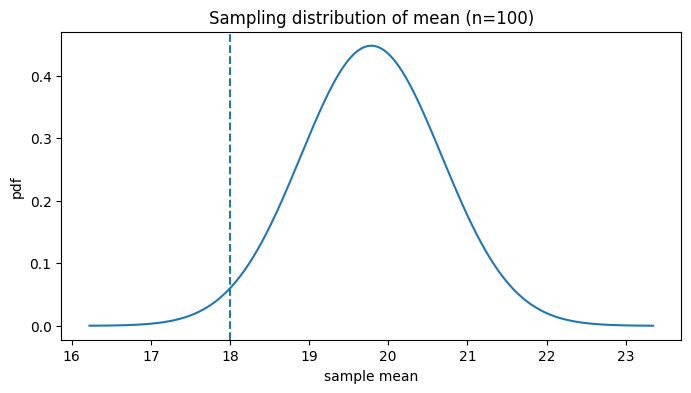

In [13]:
n = 100
mu_xbar = mu
sigma_xbar = sigma / np.sqrt(n)

x = np.linspace(mu_xbar - 4*sigma_xbar, mu_xbar + 4*sigma_xbar, 400)
pdf = stats.norm.pdf(x, loc=mu_xbar, scale=sigma_xbar)

plt.figure(figsize=(8,4))
plt.plot(x, pdf)
plt.axvline(18, linestyle="--")
plt.title(f"Sampling distribution of mean (n={n})")
plt.xlabel("sample mean")
plt.ylabel("pdf")
plt.show()

🧑🏻‍🏫 `Statistical Inference` dersinde Gauss (normal) değişkeni kavramına tekrar döneceğiz.

❓ Aradığımız olasılık hangisi?

Bunu görsel olarak tahmin edebilir misiniz?

Kesin değeri bulmak için `cdf` metodunu kullanın.

In [14]:
p = stats.norm.cdf(18, loc=mu_xbar, scale=sigma_xbar)
p

0.022421007000834294

Bunu bir de başka şekilde doğrulayalım:

❓ `18€` değeri için z-skorunu hesaplayın

In [15]:
z = (18 - mu_xbar) / sigma_xbar
z

-2.006133429914429

💡 Bu z-skoru aslında yukarıda bulduğumuz olasılığı doğrular. [Standart Normal Tabloya](https://en.wikipedia.org/wiki/Standard_normal_table) bakın; satırlarda -2.00'ı (bizim z-skorumuz) bulduğunuzda, karşılığında **0.02275** değerini göreceksiniz. Bu değer, bulduğumuz olasılığa oldukça yakındır!

❓ Standart normal dağılımı (0, 1) çizin ve hedef için kırmızı bir nokta ekleyin (`pdf` kullanın)

In [ ]:
# YOUR CODE HERE

🤩 Matematiği sevdiyseniz şu videoya göz atın: [**`The Map of Mathematics`**](https://www.youtube.com/watch?v=OmJ-4B-mS-Y) (11 dk - YouTube'da 9M izlenme)

<img src="https://live.staticflickr.com/272/32264483720_c51bdde679_n.jpg">